In [3]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating: train/sad/Training_65526454.jpg  
  inflating

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.losses import categorical_crossentropy


#  Building our Model To train the data

In [7]:
# Working with pre trained model

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [9]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2,
     shear_range = 0.2,
     horizontal_flip=True,
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train",
                                               target_size=(224,224),
                                               batch_size=32,
                                  )


train_data.class_indices

Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [13]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/train",
                                           target_size=(224,224),
                                           batch_size=32,
                                  )

Found 28709 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

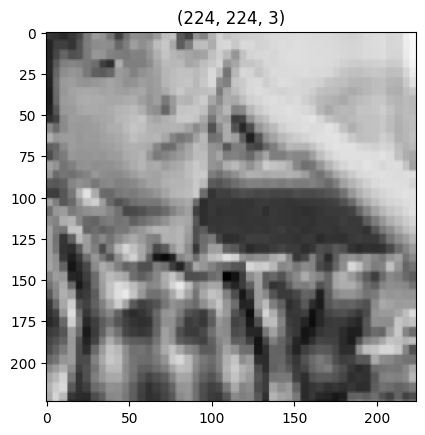

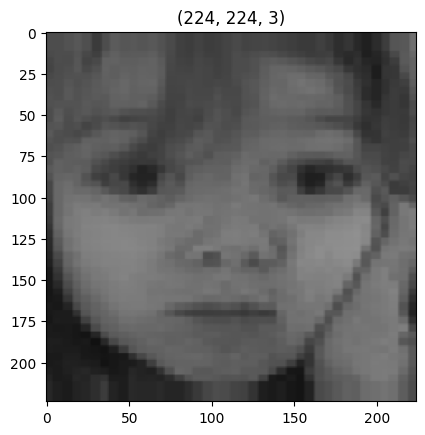

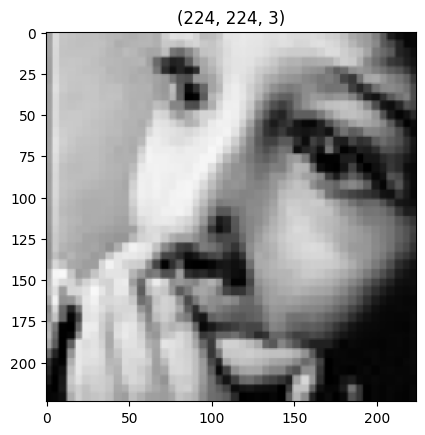

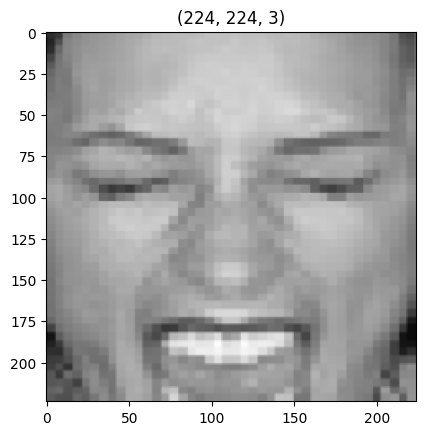

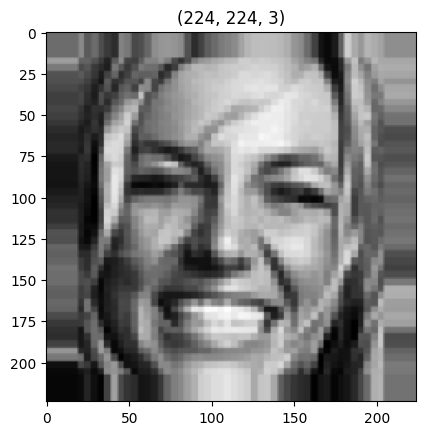

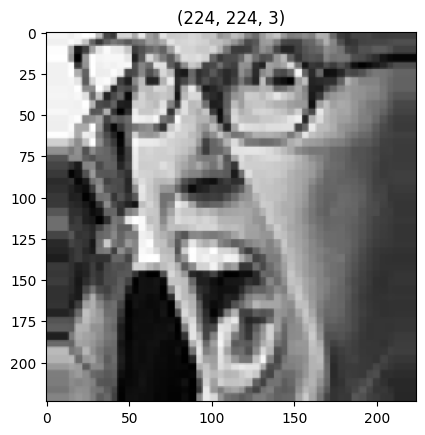

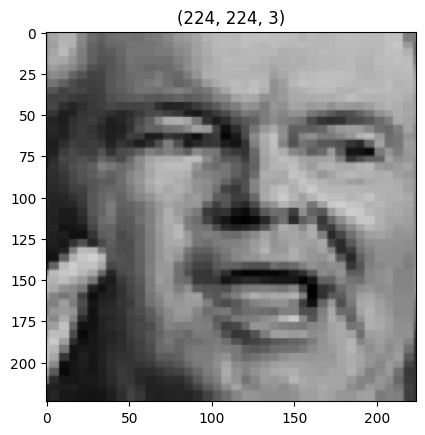

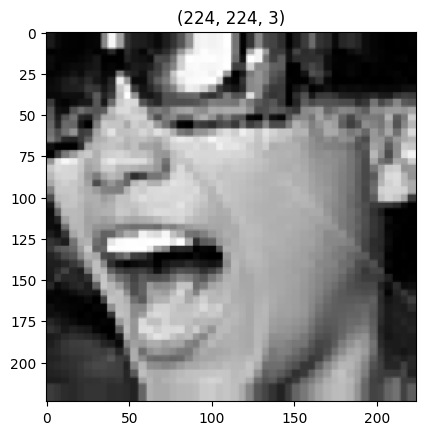

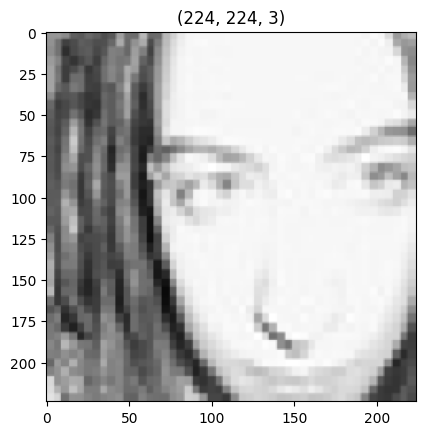

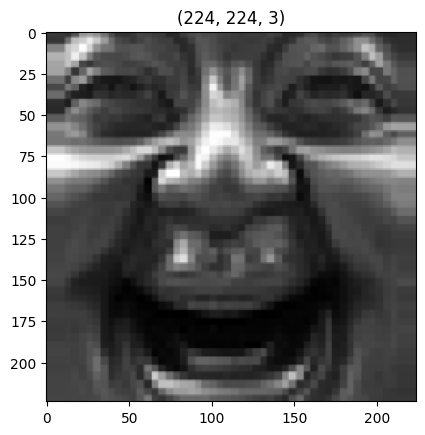

In [15]:
# to visualize the images in the traing data denerator

t_img, label = next(train_data)

#-----------------------------------------------------------------------------
# function when called will prot the images
def plotImages(img_arr, label):
  """
  input  :- images array
  output :- plots the images
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()

    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images
plotImages(t_img, label)

# having early stopping and model check point

In [16]:
## having early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list
call_back = [es, mc]

In [18]:
hist = model.fit(train_data,
                 steps_per_epoch=10,
                 epochs=30,
                 validation_data=val_data,
                 validation_steps=8,
                           callbacks=[es,mc])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.2405 - loss: 16.4508
Epoch 1: val_accuracy improved from -inf to 0.25391, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 800ms/step - accuracy: 0.2422 - loss: 16.6464 - val_accuracy: 0.2539 - val_loss: 8.8628
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.2229 - loss: 11.7457
Epoch 2: val_accuracy improved from 0.25391 to 0.37500, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 478ms/step - accuracy: 0.2271 - loss: 11.6449 - val_accuracy: 0.3750 - val_loss: 8.0425
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.2687 - loss: 8.1912
Epoch 3: val_accuracy improved from 0.37500 to 0.42578, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 387ms/step - accuracy: 0.2721 - loss: 8.1717 - val_accuracy: 0.4258 - val_loss: 7.8455
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.3258 - loss: 9.6594
Epoch 4: val_accuracy did not improve from 0.42578
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 362ms/step - accuracy: 0.3277 - loss: 9.5846 - val_accuracy: 0.3711 - val_loss: 6.5674
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.3669 - loss: 6.5317
Epoch 5: val_accuracy improved from 0.42578 to 0.42969, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 512ms/step - accuracy: 0.3687 - loss: 6.5496 - val_accuracy: 0.4297 - val_loss: 5.2553
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.4369 - loss: 5.3104
Epoch 6: val_accuracy did not improve from 0.42969
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 360ms/step - accuracy: 0.4367 - loss: 5.3216 - val_accuracy: 0.3984 - val_loss: 5.4306
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - accuracy: 0.4437 - loss: 5.2656
Epoch 7: val_accuracy did not improve from 0.42969
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 358ms/step - accuracy: 0.4437 - loss: 5.2762 - val_accuracy: 0.3633 - val_loss: 6.0581
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.3832 - loss: 6.5314
Epoch 8: val_accuracy did not improve from 0.42969
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 479ms/step - accuracy: 0.3827 - loss: 6.5126 - val_accuracy: 0.4258 - val_loss: 7.4072
Epoch 8: early stopping


In [19]:

# Loading the best fit model
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [20]:
h =  hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

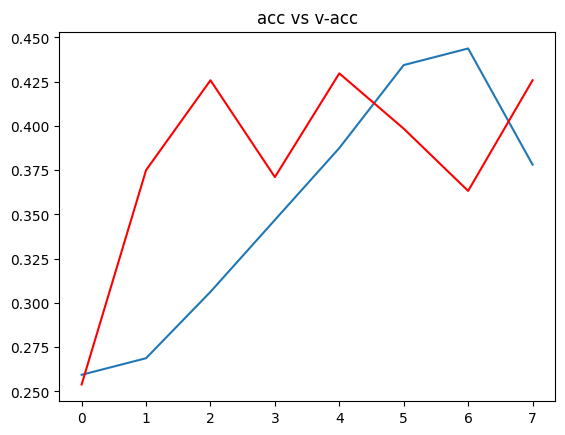

In [21]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

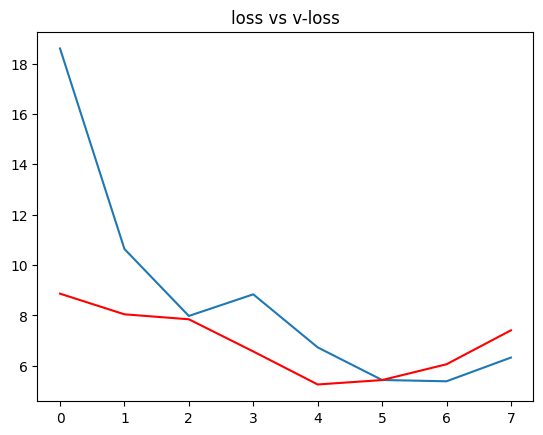

In [22]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [23]:
# just to map o/p values
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
 the image is of happy


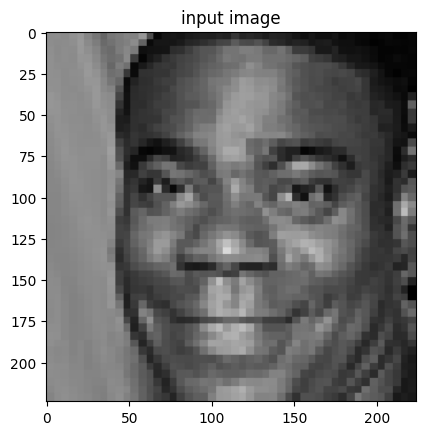

In [24]:
# path for the image to see if it predics correct class

path = "/content/PrivateTest_95094.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()